# Pyber Ride Sharing

Analysis

Observed Trend # 1 
Rides in rural areas are more expensive on average. Likely this is due to the number of miles that someone in a 
rural area is more likely to go. 

Observed Trend # 2
There are areas that have multiple rides in Urban and Suburban areas, but only a few drivers to take care of a 
large amount of rides. 

Observed Trend # 3 
There are a lot more drivers in rural areas than in Suburban or Urban areas. 

My suggestions for Pyber are as follows:
    Find a way to lower the rates in Rural areas. This should perhaps boost the amount of rides in the rural areas and 
    even out the amount of drivers as are in Urban and Suburban cities. 
    Create more incentives for drivers in URban and Suburban areas. Perhaps increasing the rates in order to pay 
    drivers in urban areas more. 


In [168]:
# import dependencies
import numpy as np
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 


In [169]:
# import the data
# Read CSV
city_data = pd.read_csv("Resources/raw_data/city_data.csv")
sorted_city_data = city_data.sort_values('city').reset_index()
ride_data = pd.read_csv("Resources/raw_data/ride_data.csv")
sorted_ride_data=ride_data.sort_values('city')

In [170]:
# create a bubble chart with this data
# Since driver data has the fare information per city, and the total number of rides per city,/
#It is the data that needs to be parsed the most. 

#Create a new dataframe with just city and fare
city_fare=sorted_ride_data[["city","fare","ride_id"]]
# Get Average Fare ($) Per City
average_fare = city_fare.groupby("city").fare.mean().rename("average_fare")
new_average_fare = average_fare.reset_index()

#average_fare.head()
ride_count = city_fare["city"].value_counts().sort_index().to_frame("ride_count")
ride_index = ride_count.reset_index().iloc[0:]
new_ride_count = ride_index.rename(columns = {"index":"city"})

fare_df = pd.merge(new_average_fare, new_ride_count,on ="city")
fare_df.head()

,city,average_fare,ride_count
0,Alvarezhaven,23.928710,31
1,Alyssaberg,20.609615,26
2,Anitamouth,37.315556,9
3,Antoniomouth,23.625000,22
4,Aprilchester,21.981579,19


In [171]:
#merge city data frame and fare_df together to create one super dataframe!
city_fare_df = pd.merge(sorted_city_data, fare_df,on ="city").rename(columns = {"type":"city_type"})
city_fare_df.head()

,index,city,driver_count,city_type,average_fare,ride_count
0,65,Alvarezhaven,21,Urban,23.928710,31
1,18,Alyssaberg,67,Urban,20.609615,26
2,94,Anitamouth,16,Suburban,37.315556,9
3,53,Antoniomouth,21,Urban,23.625000,22
4,43,Aprilchester,49,Urban,21.981579,19


In [186]:
# lets create some easy labels for all the graphs!
#Get the driver count for all the cities, this is the s variable.
driver_count = city_fare_df["driver_count"] * 5
#Take only the Urban cities
urban = city_fare_df[(city_fare_df["city_type"]=="Urban")]
#Get the ride count for the urban cities, this will be an x variable.
urban_rides = urban["ride_count"]
#Get the average fare in the urban cities
urban_average = urban["average_fare"]
#Do the same with suburban and rural as was done with urban
suburban = city_fare_df[(city_fare_df["city_type"]=="Suburban")]
suburban_rides = suburban["ride_count"]
suburban_average = suburban["average_fare"]

rural = city_fare_df[(city_fare_df["city_type"]=="Rural")]
rural_rides = rural["ride_count"]
rural_average = rural["average_fare"]

In [190]:
#Create a scatter plots with urban suburban and rural layers 
urban_scat = plt.scatter([urban_rides],[urban_average],marker='o',facecolors='coral',edgecolors='black',alpha=0.7,s=driver_count)
suburban_scat = plt.scatter([suburban_rides],[suburban_average],marker='o',facecolors='lightskyblue',edgecolors='black',alpha=0.7,s=driver_count)
rural_scat = plt.scatter([rural_rides],[rural_average],marker='o',facecolors='gold',edgecolors='black',alpha=0.7,s=driver_count)


## Bubble Plot of Sharing Data

#create a bubble chart
#use seaborn to make it pirty
plt.style.use('seaborn-whitegrid')
 
#Add labels to the x and y axes
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")
#Set the upper and lower limits of our x and y axis
plt.ylim(15,60)
plt.xlim(0,40)
# Create a legend for the chart
plt.legend((urban_scat, suburban_scat, rural_scat),("Urban", "Suburban", "Rural"))
plt.text(1, .5 ,"Note: \n Circle size correlates with driver count per city.")

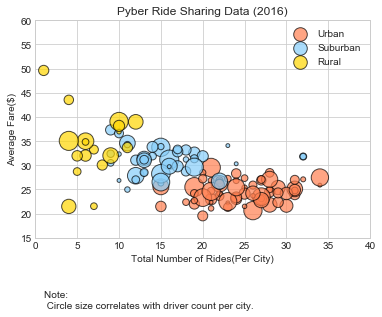

In [192]:
plt.show()

# Total Fares by City Type

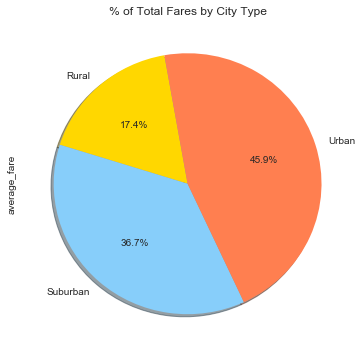

In [196]:
#Create a pie chart that shows total fares by city type
#Create a group based on the values in the 'type' column
type_group = city_fare_df.groupby('city_type')
#Count how many times each type appears in our group
count_type_fare = type_group['average_fare'].sum()
#Create a pie chart from this
colors = ('gold','lightskyblue','coral')
count_chart = count_type_fare.plot(kind='pie', figsize=(6,6), colors=colors, autopct="%1.1f%%", shadow=True, startangle=100,)
plt.title("% of Total Fares by City Type")
plt.show()


## Total Rides by City Type

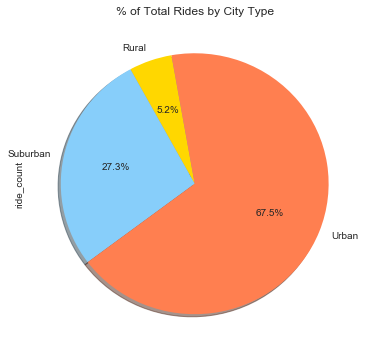

In [55]:
#Create a pie chart that shows total rides by city type.
# Count how many times each type appears in our ride_count group
count_type_rides = type_group['ride_count'].sum()
#Create a pie chart from this
colors = ('gold','lightskyblue','coral')
count_chart2 = count_type_rides.plot(kind='pie', figsize=(6,6), colors=colors, autopct="%1.1f%%", shadow=True, startangle=100)
plt.title("% of Total Rides by City Type")
plt.show()

# Total Drivers by City Type

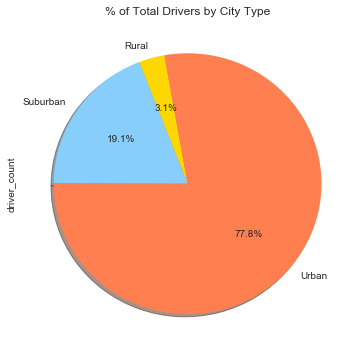

In [194]:
#Count how many times each type appears in our group
count_type_driver = type_group['driver_count'].sum()
#Create a pie chart from this
colors = ('gold','lightskyblue','coral')
count_chart3 = count_type_driver.plot(kind='pie', figsize=(6,6), colors=colors, autopct="%1.1f%%", shadow=True, startangle=100)
plt.title("% of Total Drivers by City Type")
plt.show()